In [72]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
url = 'http://bit.ly/drinksbycountry'

In [74]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [75]:
pd.read_table(url, sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [76]:
data = pd.read_csv('beer-servings.csv')

In [77]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [78]:
#data.drop('Unnamed: 0', axis=1, inplace=True) #axis to make sure it is column and inplace to save the changed data

In [79]:
data = pd.read_csv('beer-servings.csv', index_col='Unnamed: 0')

In [80]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [81]:
data.shape

(193, 6)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [83]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [84]:
data.isnull().sum()#isna() isnull() same in python but different in R

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

# Fill missing values

In [85]:
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [86]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [87]:
num_cols = data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [88]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [89]:
#imputaion : filling missing values
#simple imputer


In [90]:
from sklearn.impute import SimpleImputer

In [91]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')#np.nan : numpy method which finds the missing values
imputer =imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [92]:
type(num_cols)

numpy.ndarray

In [93]:
num_cols = pd.DataFrame(num_cols, columns =[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']])# when df converted to array column names are gone . so when we change it back to df col names should be given

In [94]:
type(num_cols)

pandas.core.frame.DataFrame

In [95]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [96]:
data.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'], axis = 1, inplace = True)

In [97]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [98]:
data = pd.concat([num_cols, data], axis=1)# if axis not given rows are checked

In [99]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [100]:
data = pd.read_csv('beer-servings.csv', index_col='Unnamed: 0')

In [101]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [102]:
#method 2

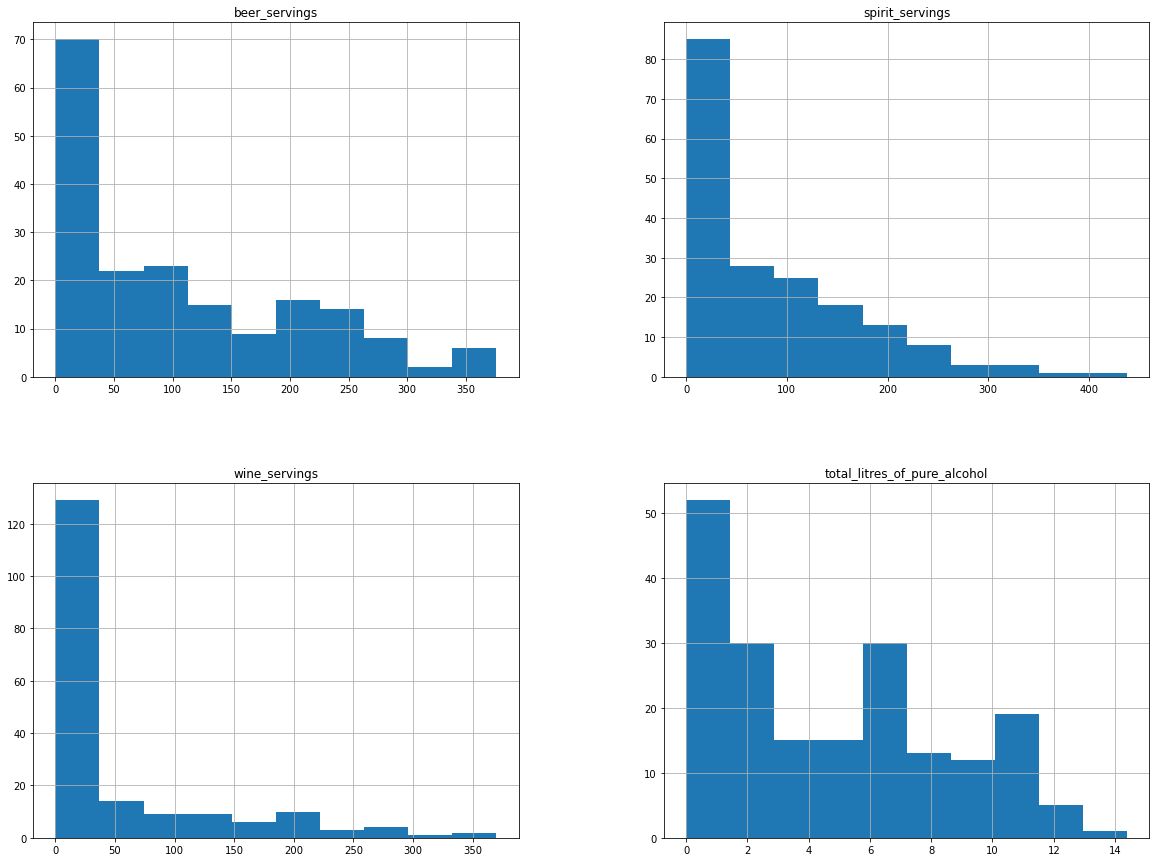

In [103]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize = (20,15))
plt.show()

In [104]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [105]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())

In [106]:
data['beer_servings'].isna().sum()

0

In [107]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
    data[i] = data[i].fillna(data[i].median())

In [108]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

# Managing Outliers

Text(0.5, 1.0, 'Boxplot of Beer Servings')

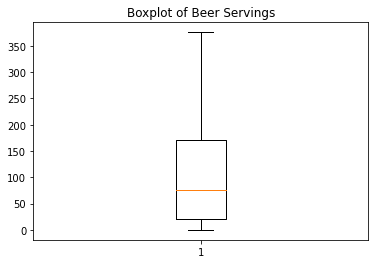

In [109]:
plt.boxplot(data['beer_servings'])
plt.title('Boxplot of Beer Servings')

Text(0.5, 1.0, 'Boxplot of Spirit Servings')

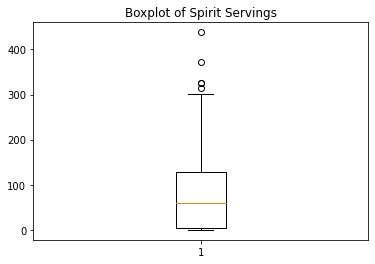

In [110]:
plt.boxplot(data['spirit_servings'])
plt.title('Boxplot of Spirit Servings')

In [111]:
Q1 = np.percentile(data['spirit_servings'], 25 , interpolation='midpoint')
Q2 = np.percentile(data['spirit_servings'], 50 , interpolation='midpoint')
Q3 = np.percentile(data['spirit_servings'], 75 , interpolation='midpoint')

In [112]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [113]:
data['spirit_servings'].median()

60.0

In [114]:
IQR = Q3 - Q1
print(IQR)

123.0


In [115]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(low_lim)
print(up_lim)

-179.5
312.5


In [116]:
outlier = []
for x in data['spirit_servings']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [117]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [118]:
ind = data['spirit_servings']>up_lim
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [119]:
data.drop([15, 68, 73, 141, 144], inplace=True)

# wine_servings

Text(0.5, 1.0, 'Boxplot of wine Servings')

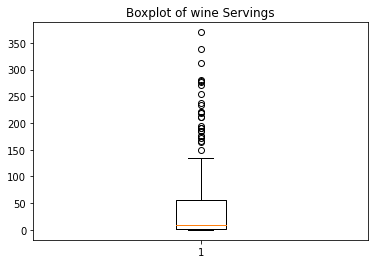

In [132]:
plt.boxplot(data['wine_servings'])
plt.title('Boxplot of wine Servings')

In [120]:
Q1_w = np.percentile(data['wine_servings'], 25 , interpolation='midpoint')
Q2_w = np.percentile(data['wine_servings'], 50 , interpolation='midpoint')
Q3_w = np.percentile(data['wine_servings'], 75 , interpolation='midpoint')
print(Q1_w)
print(Q2_w)
print(Q3_w)

1.0
9.0
57.5


In [121]:
data['wine_servings'].median()

9.0

In [122]:
IQR_w = Q3_w - Q1_w
print(IQR_w)

56.5


In [123]:
low_lim_w = Q1_w - 1.5 * IQR_w
up_lim_w = Q3_w + 1.5 * IQR_w
print(low_lim_w)
print(up_lim_w)

-83.75
142.25


In [124]:
outlier_w = []
for x in data['wine_servings']:
    if((x>up_lim_w) or (x<low_lim_w)):
        outlier_w.append(x)

In [125]:
outlier_w

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

# total_litres_of_pure_alcohol

In [ ]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('Boxplot of wine Servings')

In [126]:
Q1_t = np.percentile(data['total_litres_of_pure_alcohol'], 25 , interpolation='midpoint')
Q2_t = np.percentile(data['total_litres_of_pure_alcohol'], 50 , interpolation='midpoint')
Q3_t = np.percentile(data['total_litres_of_pure_alcohol'], 75 , interpolation='midpoint')
print(Q1_t)
print(Q2_t)
print(Q3_t)

1.25
4.2
7.05


In [127]:
data['total_litres_of_pure_alcohol'].median()

4.2

In [128]:
IQR_t = Q3_t - Q1_t
print(IQR_t)

5.8


In [129]:
low_lim_t = Q1_t - 1.5 * IQR_t
up_lim_t = Q3_t + 1.5 * IQR_t
print(low_lim_t)
print(up_lim_t)

-7.449999999999999
15.75


In [130]:
outlier_t = []
for x in data['total_litres_of_pure_alcohol']:
    if((x>up_lim_t) or (x<low_lim_t)):
        outlier_t.append(x)

In [131]:
outlier_t

[]